In [1]:
!pip install -qU face-alignment torch_snippets
import face_alignment
from torch_snippets import read, show

     |████████████████████████████████| 215kB 9.1MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 


2021-07-05 09:50:42.787 | WARNING  | torch_snippets.torch_loader:<module>:233 - Not importing Lightning Report
2021-07-05 09:50:43.440 | WARNING  | torch_snippets:<module>:13 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'


In [2]:
!wget https://www.dropbox.com/s/2s7xjto7rb6q7dc/Hema.JPG

--2021-07-05 09:50:43--  https://www.dropbox.com/s/2s7xjto7rb6q7dc/Hema.JPG
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2s7xjto7rb6q7dc/Hema.JPG [following]
--2021-07-05 09:50:43--  https://www.dropbox.com/s/raw/2s7xjto7rb6q7dc/Hema.JPG
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd3a3e469005649b569af118c0e.dl.dropboxusercontent.com/cd/0/inline/BRu4BwcxINfPYrk1t0JGyKdRUrwUl6YijIB-nXR5iQtaEDBE0hMVWKIdRDWCRmzGGQRrCTtOP7BSOmanHzpzSBKDZsfAzGZhUaBPdjeFnAk2ATdaJ2TvQme3WvGu2ZKsnwyOxNEmeg9i4nTtGSFRo3Wr/file# [following]
--2021-07-05 09:50:44--  https://ucd3a3e469005649b569af118c0e.dl.dropboxusercontent.com/cd/0/inline/BRu4BwcxINfPYrk1t0JGyKdRUrwUl6YijIB-nXR5iQtaEDBE0hMVWKIdRDWCRmzGGQRrCTtOP7BSOmanHzpzSBKDZsfAzGZhUaBPdj

In [3]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False, device='cpu')

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth


Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip


In [4]:
input = read('Hema.JPG', 1)
preds = fa.get_landmarks(input)[0]
print(preds.shape)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


(68, 2)


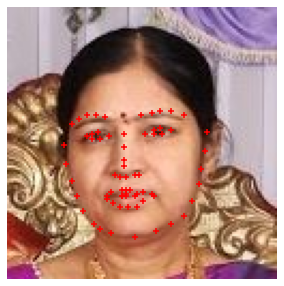

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(5,5))
show(read('Hema.JPG',1), ax=ax)
ax.scatter(preds[:,0], preds[:,1], marker='+', c='r')
plt.show()

In [6]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, flip_input=False, device='cpu')
input = read('Hema.JPG', 1)
preds = fa.get_landmarks(input)[0]
import pandas as pd
df = pd.DataFrame(preds)
df.columns = ['x','y','z']
import plotly.express as px
fig = px.scatter_3d(df, x = 'x', y = 'y', z = 'z')
fig.show()

Downloading: "https://www.adrianbulat.com/downloads/python-fan/3DFAN4-4a694010b9.zip" to /root/.cache/torch/hub/checkpoints/3DFAN4-4a694010b9.zip


Downloading: "https://www.adrianbulat.com/downloads/python-fan/depth-6c4283c0e0.zip" to /root/.cache/torch/hub/checkpoints/depth-6c4283c0e0.zip
